# Video Processing

This tutorial will help in understanding how to process a video file in OpenCV to implement any algorithm frame by frame. 


In [78]:
#Importing libraries
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import datetime

In [79]:
#Function for displaying the images using pyplot of matplotlib 
def display_image(image):
    h,w,c = image.shape
    h=h/100
    w=w/100
    plt.figure(figsize=(w,h))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

#### Function getVideoFrames will extract frames from video
Input Parameters:
* video - path of the video 
* frameWidth - resize frame to this width
* frameHeight - resize frame to this height
* numOfFrames - total number of frames we want to extract

Output:
* Returns list of frames 

In [80]:
#Function to get frames from a video
def getVideoFrames(video,frameWidth=640,frameHeight=480,numOfFrames=10):
    videoCap = cv2.VideoCapture(video)
    if (videoCap.isOpened()== False): 
        print("Error while opening video  file")
        return np.array([])
    
    videoFrames = []
    #To get frames per second
    fps = int(videoCap.get(cv2.CAP_PROP_FPS))
    totalFrames = int(videoCap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = int(totalFrames/numOfFrames)
    
    for frameNumber in range(0,totalFrames,step):    
        # 0-based index of the frame to be captured next.
        videoCap.set(1 , frameNumber-1)
        #Read the frame
        ret, frame = videoCap.read()
        if ret == True:
            frame = cv2.resize(frame,(frameWidth,frameHeight),interpolation = cv2.INTER_AREA)
            videoFrames.append(frame)
        else: 
            print('Error while reading the image frames from video')
            videoCap.release()
            return []
        
    videoCap.release()
    return videoFrames

In [81]:
video = "./video/Time_Lapse.mp4" 

In [82]:
images = getVideoFrames(video)

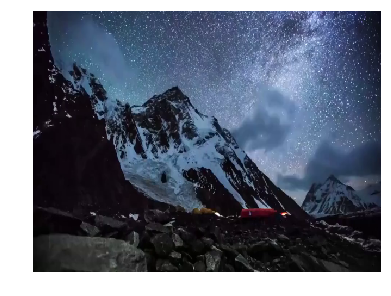

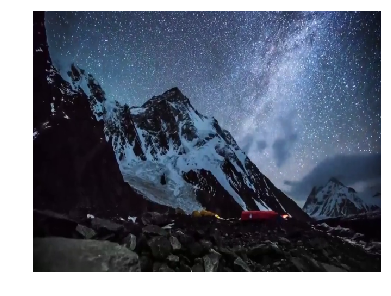

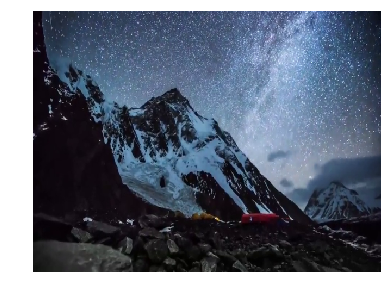

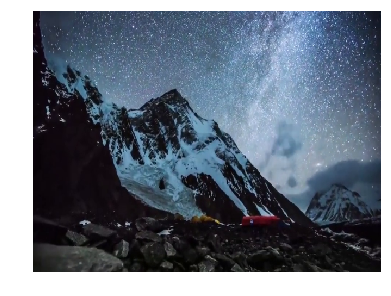

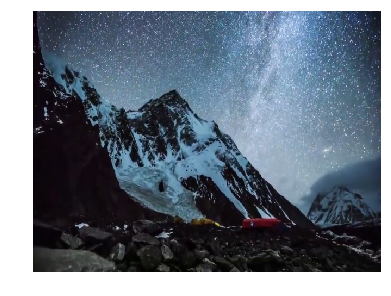

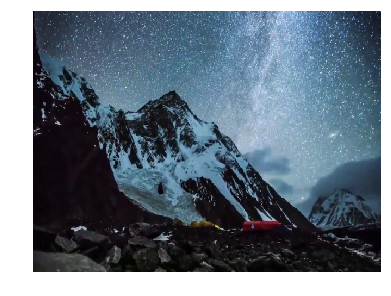

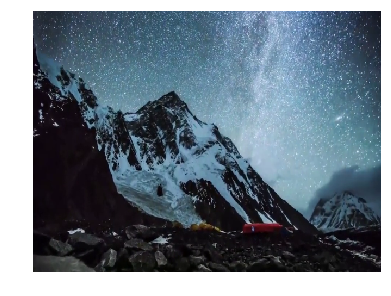

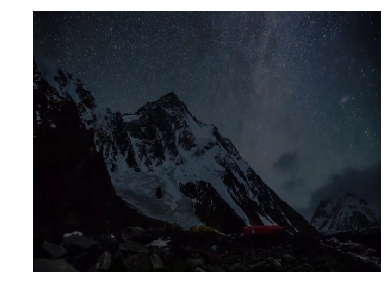

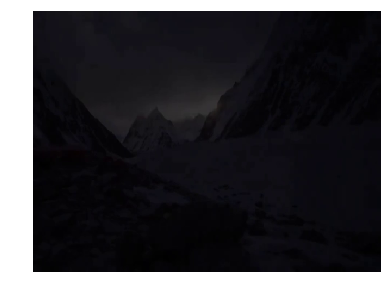

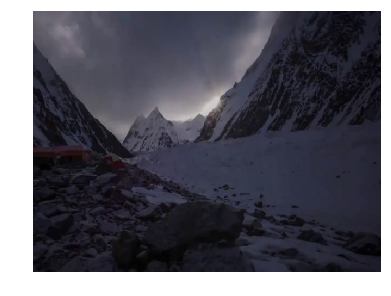

In [83]:
for i in range(10):
    display_image(images[i])